1. Розробити засоби для обліку відпуску товарів корпоративним клієнтам на автозаправках деякої мережі.
Товар характеризується ідентифікаційним номером, назвою, ціною і ознакою належності до категори пальне.
Клієнт характеризується ідентифікаційним номером і прізвищем.
Про відпуск кожного товару робиться обліковий запис у форматі
дага ідентифікаційний номер товару ідентифікаційний номер клієнта кількість в одини цях відпуску.
Якщо за одну добу клієнт заправляється кілька разів, то з третього разу відпуск пального відбува еться за ціною, вищою на k% відсотків.
Усі дані подано окремими саѵ-файлами.
2. Отримати:
(а) табличку, в якій для кожного товару (вказати його назву) пораховано сумарну вартість оплат за весь час, впорядкувати за спаданням відпущеної кількості товару;
(6) діаграму до попереднього пункту;
(в) для клієнта, прізвище якого вибирається з випадаючого списку, визначити дати, коли він за правляв авто більше двох разів за день.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import unittest
import ipywidgets as widgets
from IPython.display import display


In [2]:
class Product:
    def __init__(self, id_p, name, price, is_petrol):
        self.__id_p = id_p
        self.__name = name
        self.__price = price
        self.__is_petrol = is_petrol

    @property
    def id_p(self):
        return self.__id_p

    @id_p.setter
    def id_p(self, new):
        self.__id_p = new

    @property
    def name(self):
        return self.__name

    @name.setter
    def name(self, new):
        self.__name = new

    @property
    def price(self):
        return self.__price

    @price.setter
    def price(self, new):
        self.__price = new

    @property
    def is_petrol(self):
        return self.__is_petrol

    @is_petrol.setter
    def is_petrol(self, new):
        self.__is_petrol = new


In [3]:
class TestProduct(unittest.TestCase):
    def setUp(self):
        self.product = Product(1, 'chocolate', 10, False)

    def test_name(self):
        self.assertEqual(self.product.name, 'chocolate')

        self.product.name = 'candy'

        self.assertEqual(self.product.name, 'candy')

    def test_id_p(self):
        self.assertEqual(self.product.id_p, 1)

        self.product.id_p = 2

        self.assertEqual(self.product.id_p, 2)

    def test_price(self):
        self.assertEqual(self.product.price, 10)

        self.product.price = 15

        self.assertEqual(self.product.price, 15)

    def test_is_petrol(self):
        self.assertFalse(self.product.is_petrol)

        self.product.is_petrol = True

        self.assertTrue(self.product.is_petrol)



In [4]:
unittest.main(argv=[''], exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


In [5]:
products = pd.read_csv('products.csv')
products

,id_p,name,price,is_petrol
0,1,chocolate,10,no
1,2,A95,40,yes
2,3,water,20,no
3,4,A92,35,yes
4,5,disel,39,yes


In [6]:
client = pd.read_csv('client.csv')
client

,id,surname
0,1,ivanov
1,2,petrov
2,3,sidorov


In [7]:
account = pd.read_csv('account.csv')
account

,date,id_p,id,quantity
0,2024-01-01,1,1,2
1,2024-01-01,2,1,1
2,2024-01-02,4,2,1
3,2024-01-02,5,3,4
4,2024-01-03,3,2,1


In [8]:
all_data = pd.merge(account, client, on='id', how='inner')
all_data = pd.merge(all_data, products, on='id_p', how='inner')

all_data['date'] = pd.to_datetime(all_data['date'], errors='coerce')

all_data['total_price'] = 0

all_data.loc[(all_data['quantity'] >= 3) & (all_data['is_petrol'] == 'yes'), 'total_price'] = all_data['quantity'] * 1.5 * all_data['price']

all_data.loc[~((all_data['quantity'] >= 3) & (all_data['is_petrol'] == 'yes')), 'total_price'] = all_data['quantity'] * all_data['price']

all_data

,date,id_p,id,quantity,surname,name,price,is_petrol,total_price
0,2024-01-01,1,1,2,ivanov,chocolate,10,no,20
1,2024-01-01,2,1,1,ivanov,A95,40,yes,40
2,2024-01-02,4,2,1,petrov,A92,35,yes,35
3,2024-01-02,5,3,4,sidorov,disel,39,yes,234
4,2024-01-03,3,2,1,petrov,water,20,no,20


In [9]:
all_data['total_price'] = all_data['price'] * all_data['quantity']
total_price = all_data.groupby('name')['total_price'].sum().reset_index()
total_price

,name,total_price
0,A92,35
1,A95,40
2,chocolate,20
3,disel,156
4,water,20


In [10]:
all_data=all_data.sort_values(by='quantity', ascending=False)
all_data

,date,id_p,id,quantity,surname,name,price,is_petrol,total_price
3,2024-01-02,5,3,4,sidorov,disel,39,yes,156
0,2024-01-01,1,1,2,ivanov,chocolate,10,no,20
1,2024-01-01,2,1,1,ivanov,A95,40,yes,40
2,2024-01-02,4,2,1,petrov,A92,35,yes,35
4,2024-01-03,3,2,1,petrov,water,20,no,20


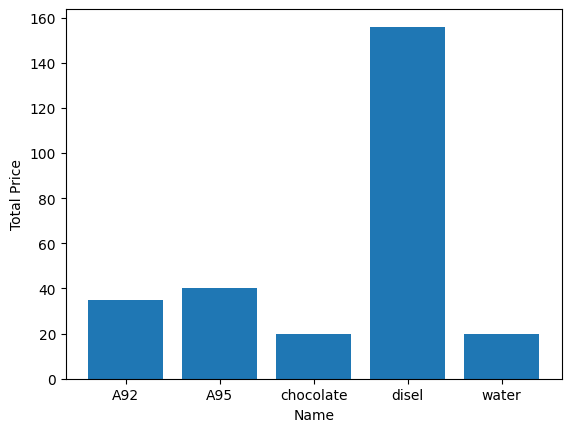

In [11]:
plt.bar(total_price['name'], total_price['total_price'])
plt.xlabel('Name')
plt.ylabel('Total Price')
plt.show()


In [12]:
wd = widgets.Dropdown(
    options=all_data['surname'].unique(),
    value=all_data['surname'].iloc[0],
    description='Прізвища',
    disabled=False
)
data = all_data.reset_index()

def show(value):
    if value in data['surname'].values:
        filtred = data[(data['surname'] == value) & (data['quantity'] > 2) & (data['is_petrol'] == 'yes')]
        if not filtred.empty:
            print(f"{value} заправлявся більше 2 разів у дати:")
            for date in filtred['date'].dt.strftime('%Y-%m-%d'):
                print(f" - {date}")
        else:
            print(f"{value} не заправлявся більше 2 разів")
    
widget = widgets.interactive(show, value=wd)

display(widget)

interactive(children=(Dropdown(description='Прізвища', options=('sidorov', 'ivanov', 'petrov'), value='sidorov…